# READING FROM EXTERNAL CSVs:


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlb inline

UsageError: Line magic function `%matplotlb` not found.


In [21]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_l

In [22]:
df=pd.read_csv('market-price.csv')

In [23]:

df.head()

,Timestamp,market-price
0,2021-05-28 00:00:00,38445.29
1,2021-05-29 00:00:00,35689.62
2,2021-05-30 00:00:00,34647.67
3,2021-05-31 00:00:00,35684.59
4,2021-06-01 00:00:00,37310.54


In [24]:
df.tail()

,Timestamp,market-price
361,2022-05-24 00:00:00,29074.33
362,2022-05-25 00:00:00,29634.57
363,2022-05-26 00:00:00,29518.59
364,2022-05-27 00:00:00,29193.92
365,2022-05-28 00:00:00,28578.89


Note that traditional *.head()* and *.tail()* give us 5 entries, we can actually specify more in the brackets given.

In [25]:
df.columns= ['Timestamp', 'Price']

In [26]:
df.shape

(366, 2)

In [27]:
df.head()

,Timestamp,Price
0,2021-05-28 00:00:00,38445.29
1,2021-05-29 00:00:00,35689.62
2,2021-05-30 00:00:00,34647.67
3,2021-05-31 00:00:00,35684.59
4,2021-06-01 00:00:00,37310.54


In [28]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

We can do a vector operation to parse all the timestamp objects as "DATETIME" rather than strings (which was the case earlier)

In [29]:
pd.to_datetime(df['Timestamp'])

0     2021-05-28
1     2021-05-29
2     2021-05-30
3     2021-05-31
4     2021-06-01
         ...    
361   2022-05-24
362   2022-05-25
363   2022-05-26
364   2022-05-27
365   2022-05-28
Name: Timestamp, Length: 366, dtype: datetime64[ns]

In [30]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])  #we convert timestamp's datatype

In [31]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

The timestamp looks a lot like the index of this DataFrame: date > price. We can change the autoincremental ID generated by pandas and use the Timestamp DS column as the Index:

In [32]:
df.set_index('Timestamp', inplace=True)

In [33]:
df.head()

,Price
Timestamp,
2021-05-28,38445.29
2021-05-29,35689.62
2021-05-30,34647.67
2021-05-31,35684.59
2021-06-01,37310.54


In [34]:
df.loc['2021-07-28']

Price    39405.95
Name: 2021-07-28 00:00:00, dtype: float64

## Putting everything together
And now, we've finally arrived to the final, desired version of the DataFrame parsed from our CSV file. The steps were:

There should be a better way. And there is 😎. And there usually is, explicitly with all these repetitive tasks with pandas.

The read_csv function is extremely powerful and you can specify many more parameters at import time. We can achive the same results with only one line by doing:

In [37]:
df = pd.read_csv(
    'market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

In [38]:
df.head()

,Price
Timestamp,
Timestamp,market-price
2021-05-28 00:00:00,38445.29
2021-05-29 00:00:00,35689.62
2021-05-30 00:00:00,34647.67
2021-05-31 00:00:00,35684.59


In [39]:
df.shape


(367, 1)

# PLOTTING BASICS

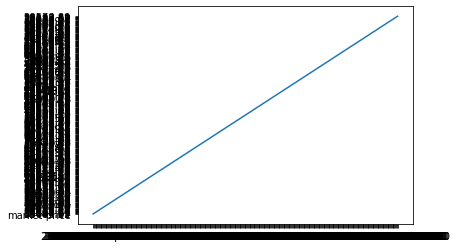

In [84]:
plt.plot(df.index, df['Price'])

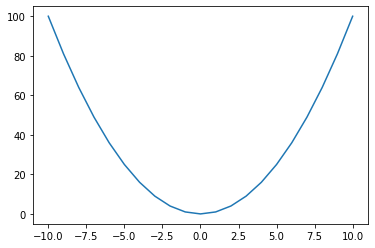

In [49]:
x=np.arange(-10,11)
plt.plot(x,x**2)

Text(0.5, 1.0, 'My random plot')

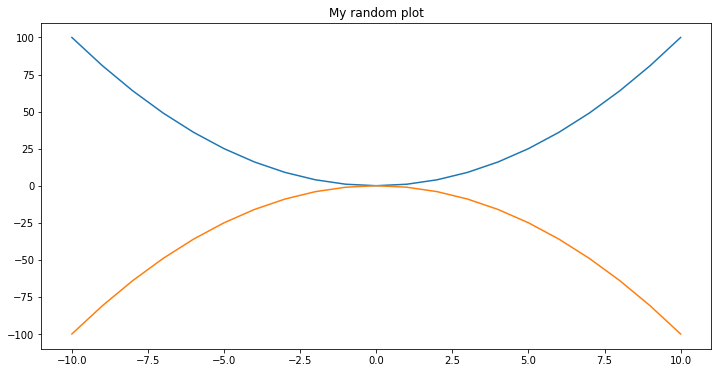

In [56]:
plt.figure(figsize=(12,6)) #figuresize is a tuple
plt.plot(x, x**2)
plt.plot(x,-1*x**2)
plt.title('My random plot')

### A More chalenging parsing
    To demonstrate plotting 2 columns together, we'll try to add Ether pieces to our df Dataframe.
    The ETH prices data can be found in the data/eth-price.csv file. The problem is that it seems like that CSV file was created by someone who really hated programmers. Take a look at it and see how ugly it looks like. We'll still use pandas to parse it.


In [65]:
eth=pd.read_csv('eth-market-price.csv')
eth.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/28/2022,1774.55,NaN,1764.41,1795.50,1764.72
1,05/27/2022,1758.05,NaN,1768.29,1762.42,1722.88
2,05/26/2022,1769.78,NaN,1948.88,1807.02,1734.05
3,05/25/2022,1943.28,NaN,2013.72,1964.91,1934.20
4,05/24/2022,2015.14,NaN,1987.94,2020.64,1971.07


In [69]:
eth.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/28/2022,1774.55,NaN,1764.41,1795.50,1764.72
1,05/27/2022,1758.05,NaN,1768.29,1762.42,1722.88
2,05/26/2022,1769.78,NaN,1948.88,1807.02,1734.05
3,05/25/2022,1943.28,NaN,2013.72,1964.91,1934.20
4,05/24/2022,2015.14,NaN,1987.94,2020.64,1971.07


In [70]:
pd.to_datetime(eth['Date']).head()


0   2022-05-28
1   2022-05-27
2   2022-05-26
3   2022-05-25
4   2022-05-24
Name: Date, dtype: datetime64[ns]

That seems to work fine! Why isn't it then parsing the Date(UTC) column? Simple, the parse_dates=True parameter will instruct pandas to parse the index of the DataFrame. If you want to parse any other column, you must explicitly pass the column position or name:

In [71]:
pd.read_csv('eth-market-price.csv', parse_dates=[0]).head()


,Date,Close/Last,Volume,Open,High,Low
0,2022-05-28,1774.55,NaN,1764.41,1795.50,1764.72
1,2022-05-27,1758.05,NaN,1768.29,1762.42,1722.88
2,2022-05-26,1769.78,NaN,1948.88,1807.02,1734.05
3,2022-05-25,1943.28,NaN,2013.72,1964.91,1934.20
4,2022-05-24,2015.14,NaN,1987.94,2020.64,1971.07


In [79]:
eth = pd.read_csv('eth-market-price.csv', parse_dates=True, index_col=0)
print(eth.info())

eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2022-05-28 to 2022-04-29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  30 non-null     float64
 1   Volume      0 non-null      float64
 2   Open        30 non-null     float64
 3   High        30 non-null     float64
 4   Low         30 non-null     float64
dtypes: float64(5)
memory usage: 1.4 KB
None


,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-05-28,1774.55,NaN,1764.41,1795.50,1764.72
2022-05-27,1758.05,NaN,1768.29,1762.42,1722.88
2022-05-26,1769.78,NaN,1948.88,1807.02,1734.05
2022-05-25,1943.28,NaN,2013.72,1964.91,1934.20
2022-05-24,2015.14,NaN,1987.94,2020.64,1971.07


We can now combine both DataFrames into one. Both have the same index, so aligning both prices will be easy. Let's first create an empty DataFrame and with the index from Bitcoin prices:

In [74]:
prices = pd.DataFrame(index=df.index)
prices.head()
    


""
Timestamp
Timestamp
2021-05-28 00:00:00
2021-05-29 00:00:00
2021-05-30 00:00:00
2021-05-31 00:00:00


In [82]:
prices['Bitcoin'] = df['Price']
prices['Ether']=eth['Close/Last']
prices.head()


,Bitcoin,Ether
Timestamp,,
Timestamp,market-price,NaN
2021-05-28 00:00:00,38445.29,NaN
2021-05-29 00:00:00,35689.62,NaN
2021-05-30 00:00:00,34647.67,NaN
2021-05-31 00:00:00,35684.59,NaN


<AxesSubplot:xlabel='Timestamp'>

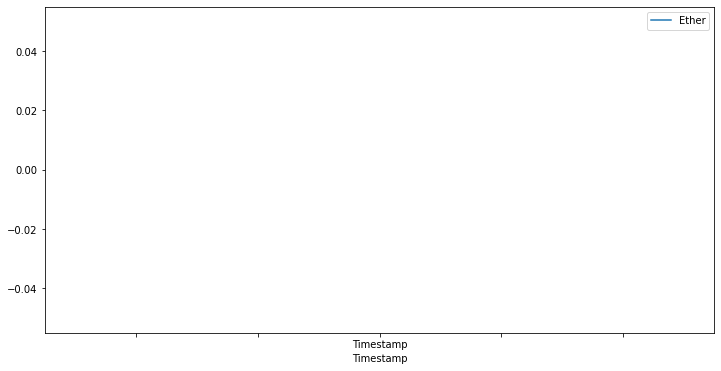

In [83]:
prices.plot(figsize=(12, 6))


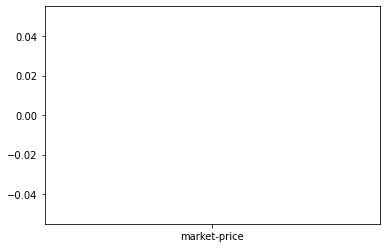

In [85]:
plt.plot(prices['Bitcoin'], prices['Ether'])